In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Loading dataset

In [3]:
df = pd.read_csv(r"../input/brasilian-houses-to-rent/houses_to_rent.csv")
df = df.drop(['Unnamed: 0'], axis = 1)
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,1,160,3,2,2,-,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   object
 9   rent amount     6080 non-null   object
 10  property tax    6080 non-null   object
 11  fire insurance  6080 non-null   object
 12  total           6080 non-null   object
dtypes: int64(5), object(8)
memory usage: 617.6+ KB


### Data Cleaning
#### Since the coloumns hoa,rent amount,property tax,fire insurance and total have string character which also turn the datatype of these colums to object type, thefore, we must have to remove these string chracters from these coloumns and change the data type too. 

In [5]:
df.isna().sum()
df['hoa'] = df['hoa'].str.replace(r'\D', '')

df['rent amount']=df['rent amount'].str.replace(r'\D', '')

df['property tax']=df['property tax'].str.replace(r'\D', '')

df['fire insurance']=df['fire insurance'].str.replace(r'\D', '')

df['total']=df['total'].str.replace(r'\D', '')

df['floor'] = df['floor'].replace('-',np.nan)

####################################################################
df['hoa']=pd.to_numeric(df['hoa'])
df['hoa']= df['hoa'].fillna(df['hoa'].median()).astype('int')

df['rent amount']=pd.to_numeric(df['rent amount'])
df['rent amount'] = df['rent amount'].fillna(df['rent amount'].median()).astype('int')

df['property tax']=pd.to_numeric(df['property tax'])
df['property tax'] = df['property tax'].fillna(df['property tax'].median()).astype('int')

df['fire insurance']=pd.to_numeric(df['fire insurance'])
df['fire insurance'] = df['fire insurance'].fillna(df['fire insurance'].median()).astype('int')

df['floor']= df['floor'].fillna(df['floor'].median()).astype('int')

df['total'] = df['total'].fillna(df['total'].median()).astype('int')

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   int64 
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   int64 
 9   rent amount     6080 non-null   int64 
 10  property tax    6080 non-null   int64 
 11  fire insurance  6080 non-null   int64 
 12  total           6080 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 617.6+ KB


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,6,acept,furnished,0,8000,1000,121,9121
1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,1,19,1,1,0,6,not acept,not furnished,0,1200,41,16,1257


### **Label Encoding**
As it is obvious that coloumns animal and furniture are categorical variables so we have to convert these variables into numerical values by using labelencoder method

In [6]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df['animal'] = la.fit_transform(df['animal'])
df['furniture'] =la.fit_transform(df['furniture'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   city            6080 non-null   int64
 1   area            6080 non-null   int64
 2   rooms           6080 non-null   int64
 3   bathroom        6080 non-null   int64
 4   parking spaces  6080 non-null   int64
 5   floor           6080 non-null   int64
 6   animal          6080 non-null   int64
 7   furniture       6080 non-null   int64
 8   hoa             6080 non-null   int64
 9   rent amount     6080 non-null   int64
 10  property tax    6080 non-null   int64
 11  fire insurance  6080 non-null   int64
 12  total           6080 non-null   int64
dtypes: int64(13)
memory usage: 617.6 KB


### Pairplot visualization

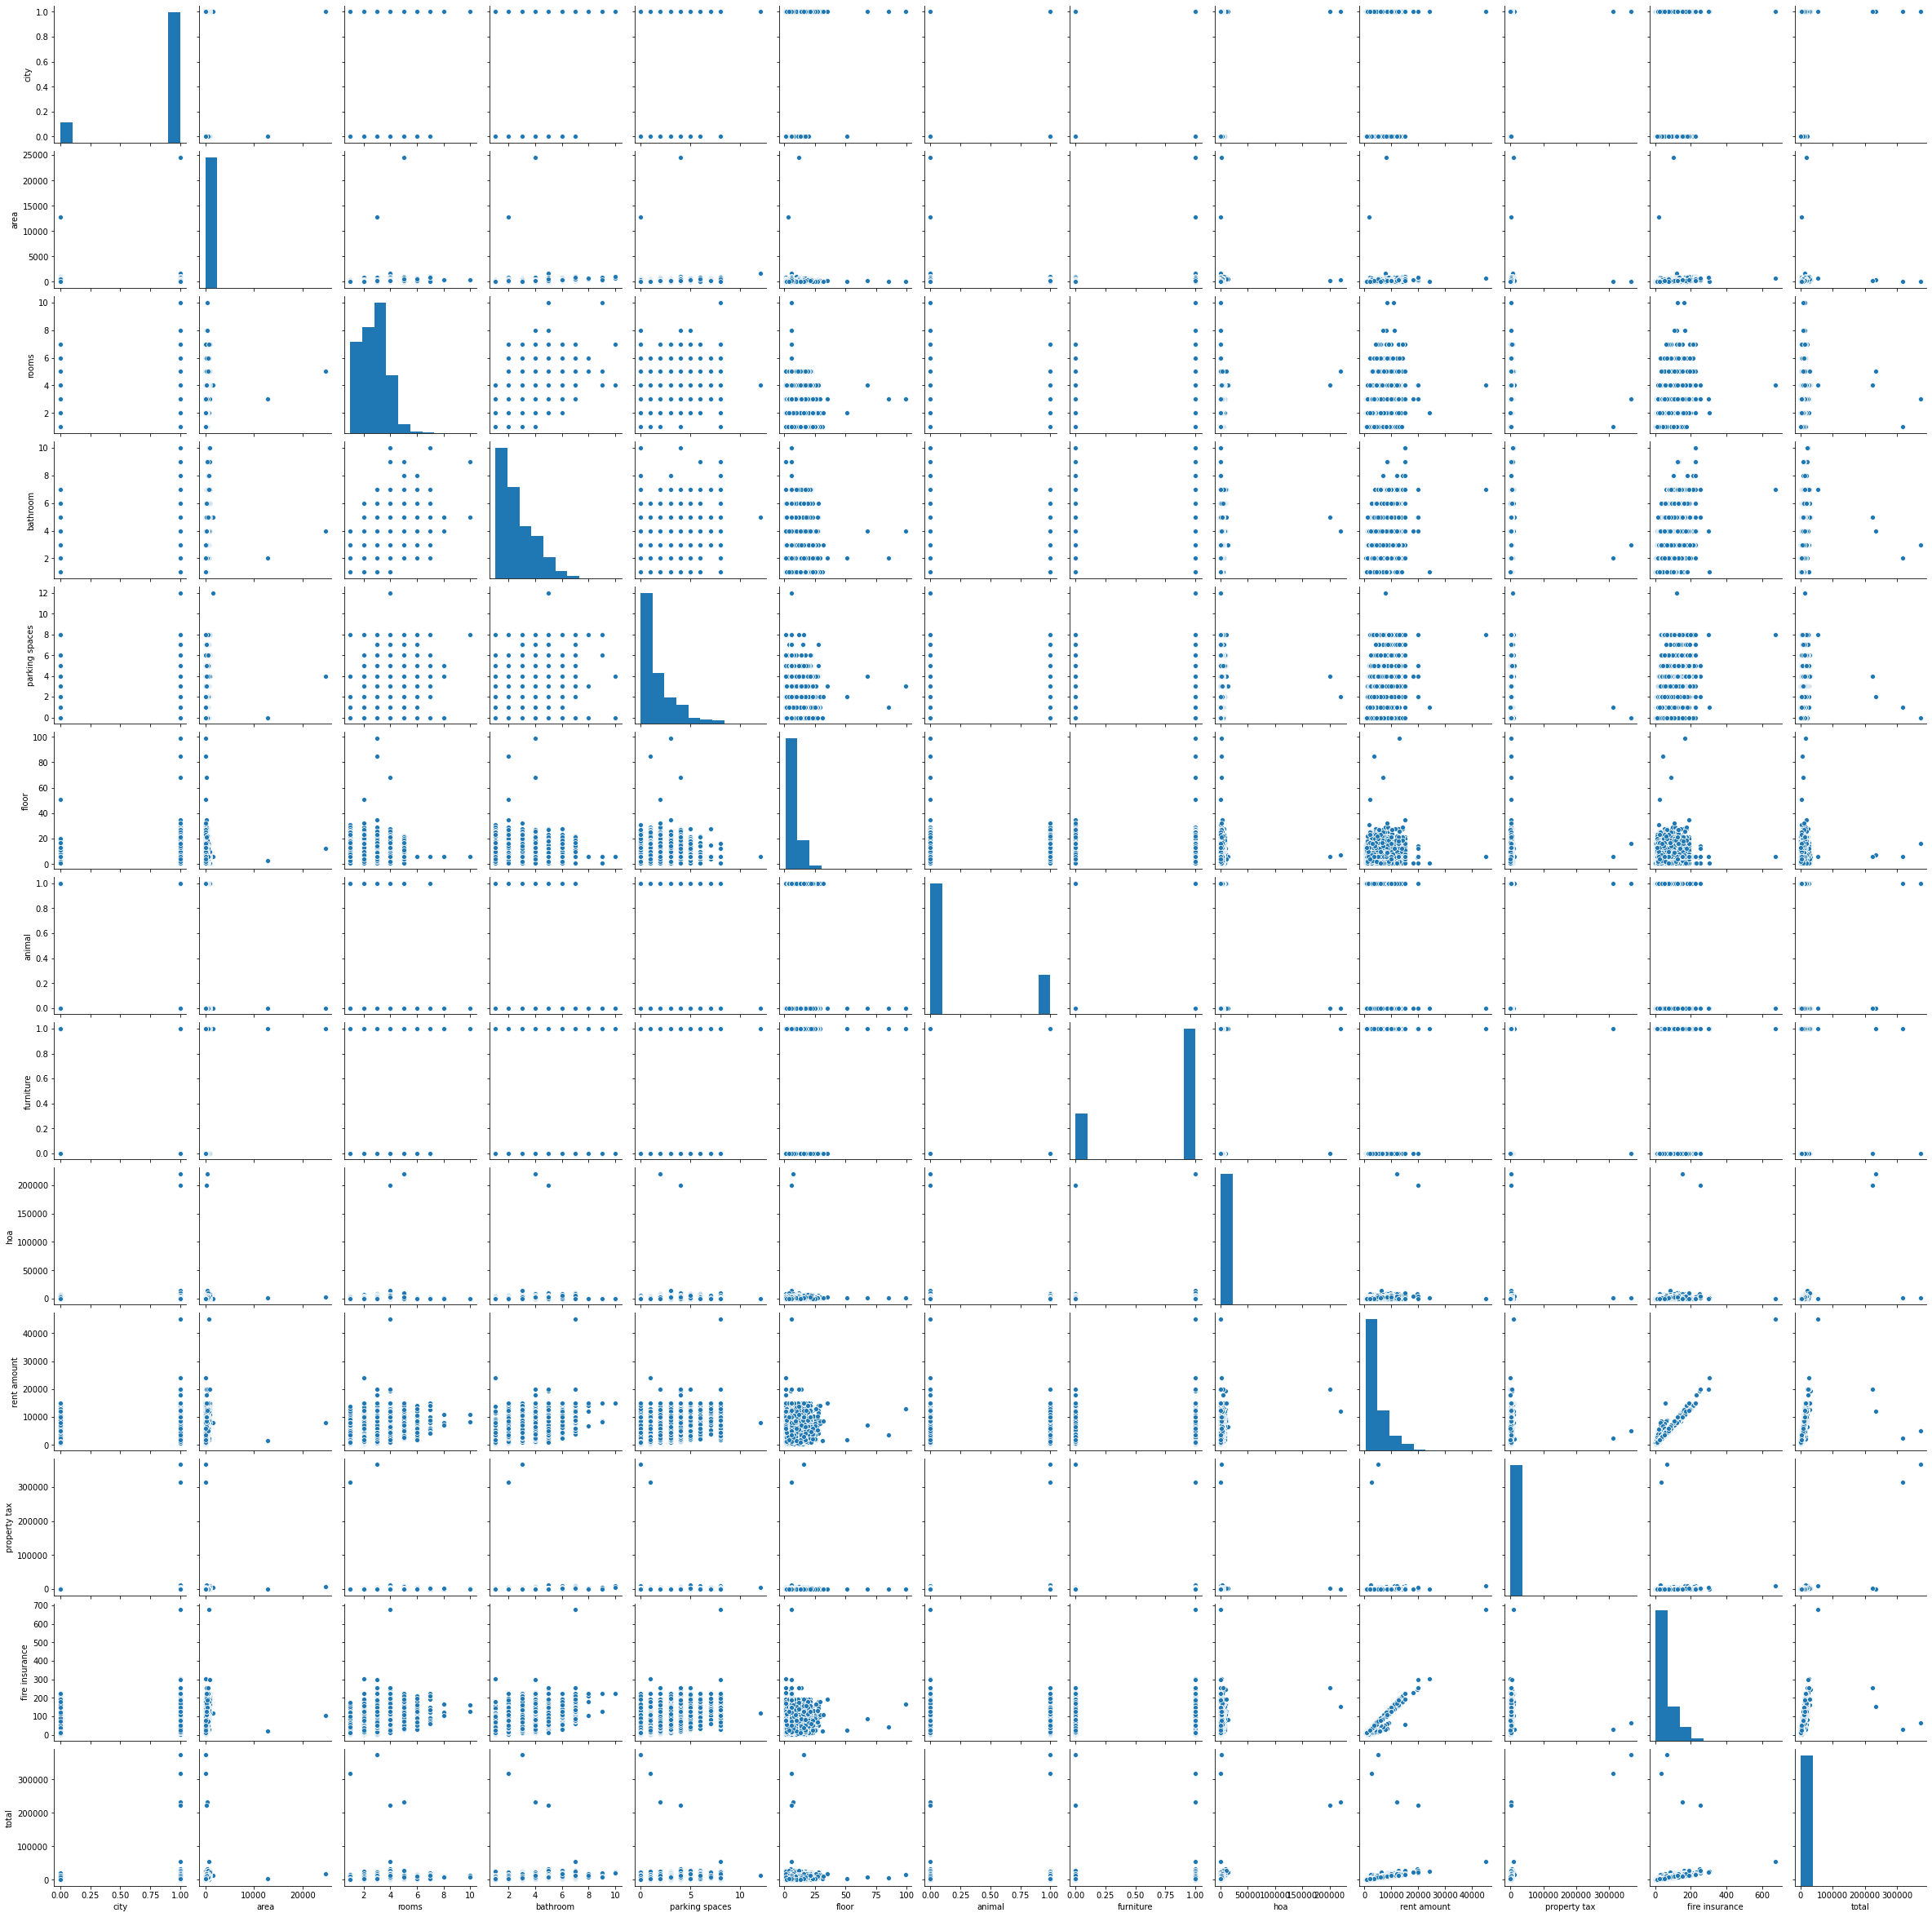

In [7]:
sns.pairplot(df)

### Correlation analysis 

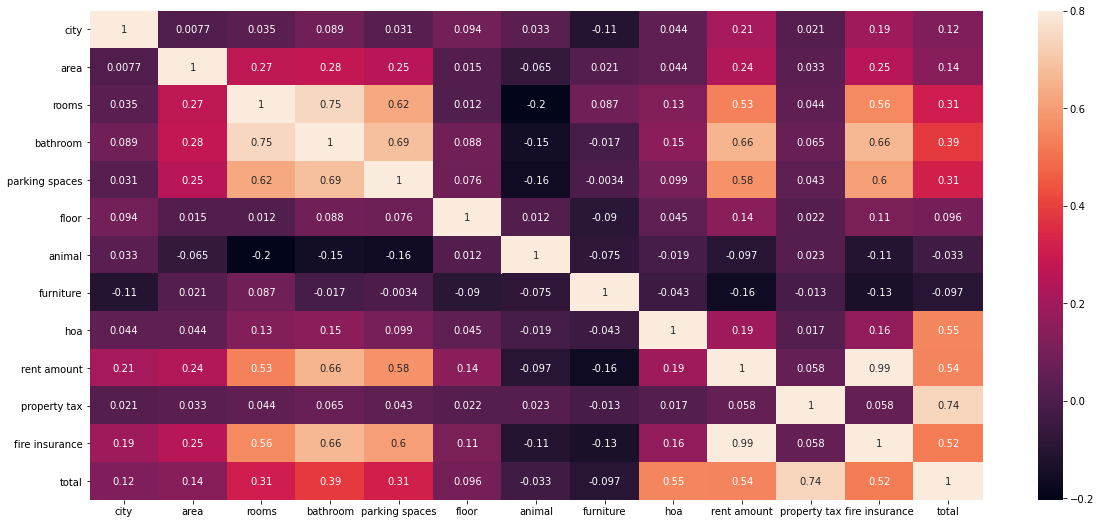

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

#### Heatmap of correlation matrix indicates that property tax,hoa,rent amount and fire insurance are highly correlated to total,respectively

### Distribution plot
#### By having a look at the pairplot, we can suggest that some of the features shows skewness in the data. Lets check them individually

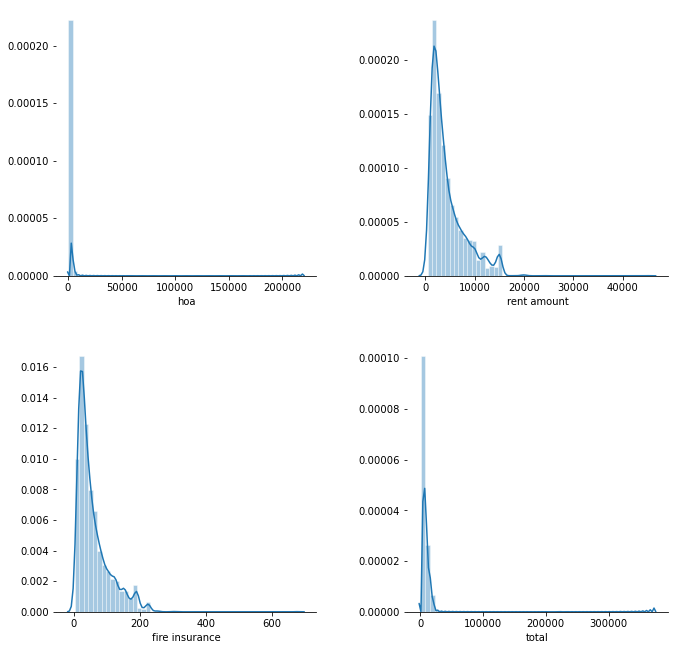

In [9]:
f, axes = plt.subplots(2, 2,figsize=(10,10))
sns.set(style = 'darkgrid')
sns.despine(left=True)
sns.distplot(df['hoa'],ax=axes[0,0])
sns.distplot(df['rent amount'],ax=axes[0,1])
sns.distplot(df['fire insurance'],ax=axes[1, 0])
sns.distplot(df['total'],ax=axes[1, 1])

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

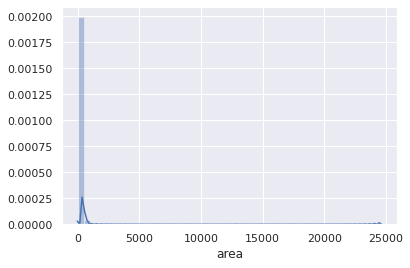

In [10]:
sns.distplot(df['area'])

In [11]:
df_new = df.copy()
#df_new


#### In order to distribute the data normally, we can use log function and then choose an IQR in order to overcome outliers

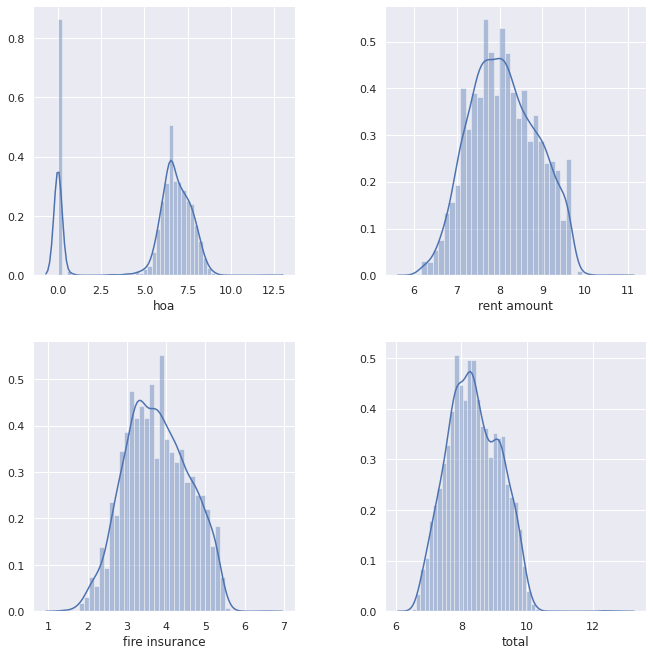

In [12]:
df['area'] = np.log1p(df['area'])
df.hoa = np.log1p(df.hoa)
df['rent amount'] = np.log1p(df['rent amount'])
df['property tax'] = np.log1p(df['property tax'])
df['fire insurance'] = np.log1p(df['fire insurance'])
df.total = np.log1p(df.total)
f, axes = plt.subplots(2, 2,figsize=(10,10))
sns.set(style = 'darkgrid')
sns.despine(left=True)
sns.distplot(df['hoa'],ax=axes[0,0])
sns.distplot(df['rent amount'],ax=axes[0,1])
sns.distplot(df['fire insurance'],ax=axes[1, 0])
sns.distplot(df['total'],ax=axes[1, 1])


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

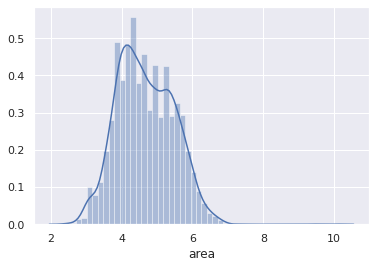

In [13]:
sns.distplot(df['area'])

In [14]:
df=df[(df['area'] >= 3) & (df['area'] <= 7 )\
    &(df['hoa'] >= 5) & (df['hoa'] <= 9 )\
      & (df['property tax'] >= 2) & (df['property tax'] <= 9 )\
      & (df['total'] >= 7) & (df['total'] <= 11 )]
#df

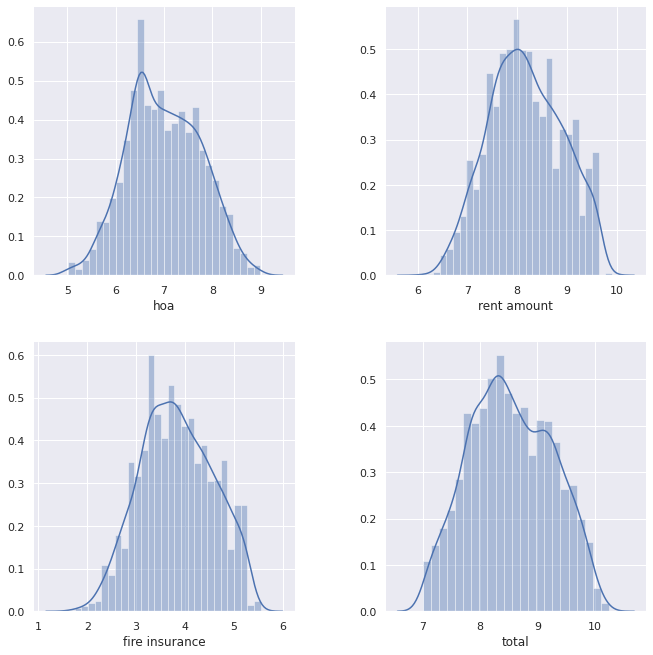

In [15]:
f, axes = plt.subplots(2, 2,figsize=(10,10))
sns.set(style = 'darkgrid')
sns.despine(left=True)
sns.distplot(df['hoa'],ax=axes[0,0])
sns.distplot(df['rent amount'],ax=axes[0,1])
sns.distplot(df['fire insurance'],ax=axes[1, 0])
sns.distplot(df['total'],ax=axes[1, 1])


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

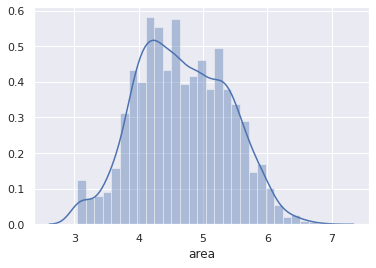

In [16]:
sns.distplot(df['area'])

#### The data looks like perfectly distributed which can be seen by their distribution plots and by pairplot diagram as shown in below

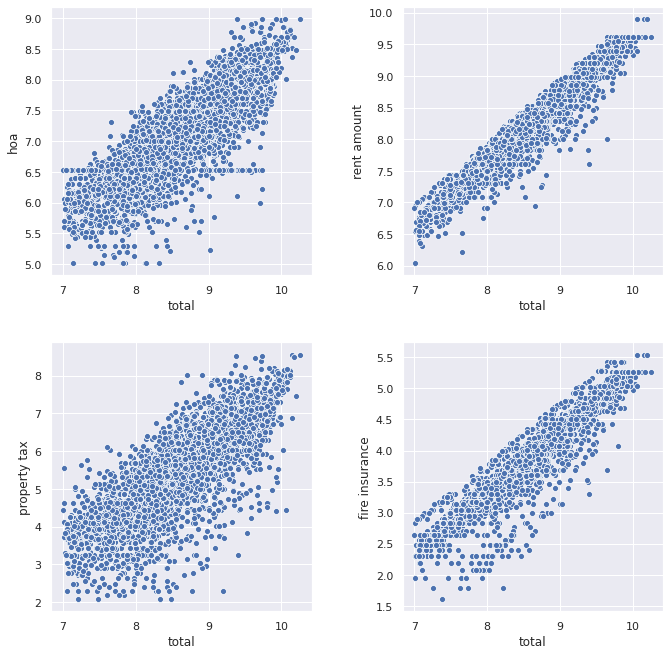

In [17]:
f, axes = plt.subplots(2, 2,figsize=(10,10))
sns.set(style = 'darkgrid')

g = sns.scatterplot("total", "hoa", data=df,ax=axes[0, 0]
                  
                  
                  )
g = sns.scatterplot("total", "rent amount", data=df,
                  ax=axes[0, 1]
                  
                  )
g = sns.scatterplot("total","property tax", data=df,
                  ax=axes[1, 0]
                  
                  )
g = sns.scatterplot("total","fire insurance", data=df,
                  ax=axes[1, 1]
                  
                  )
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

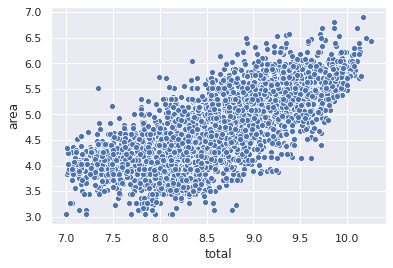

In [18]:
g = sns.scatterplot("total","area", data=df)

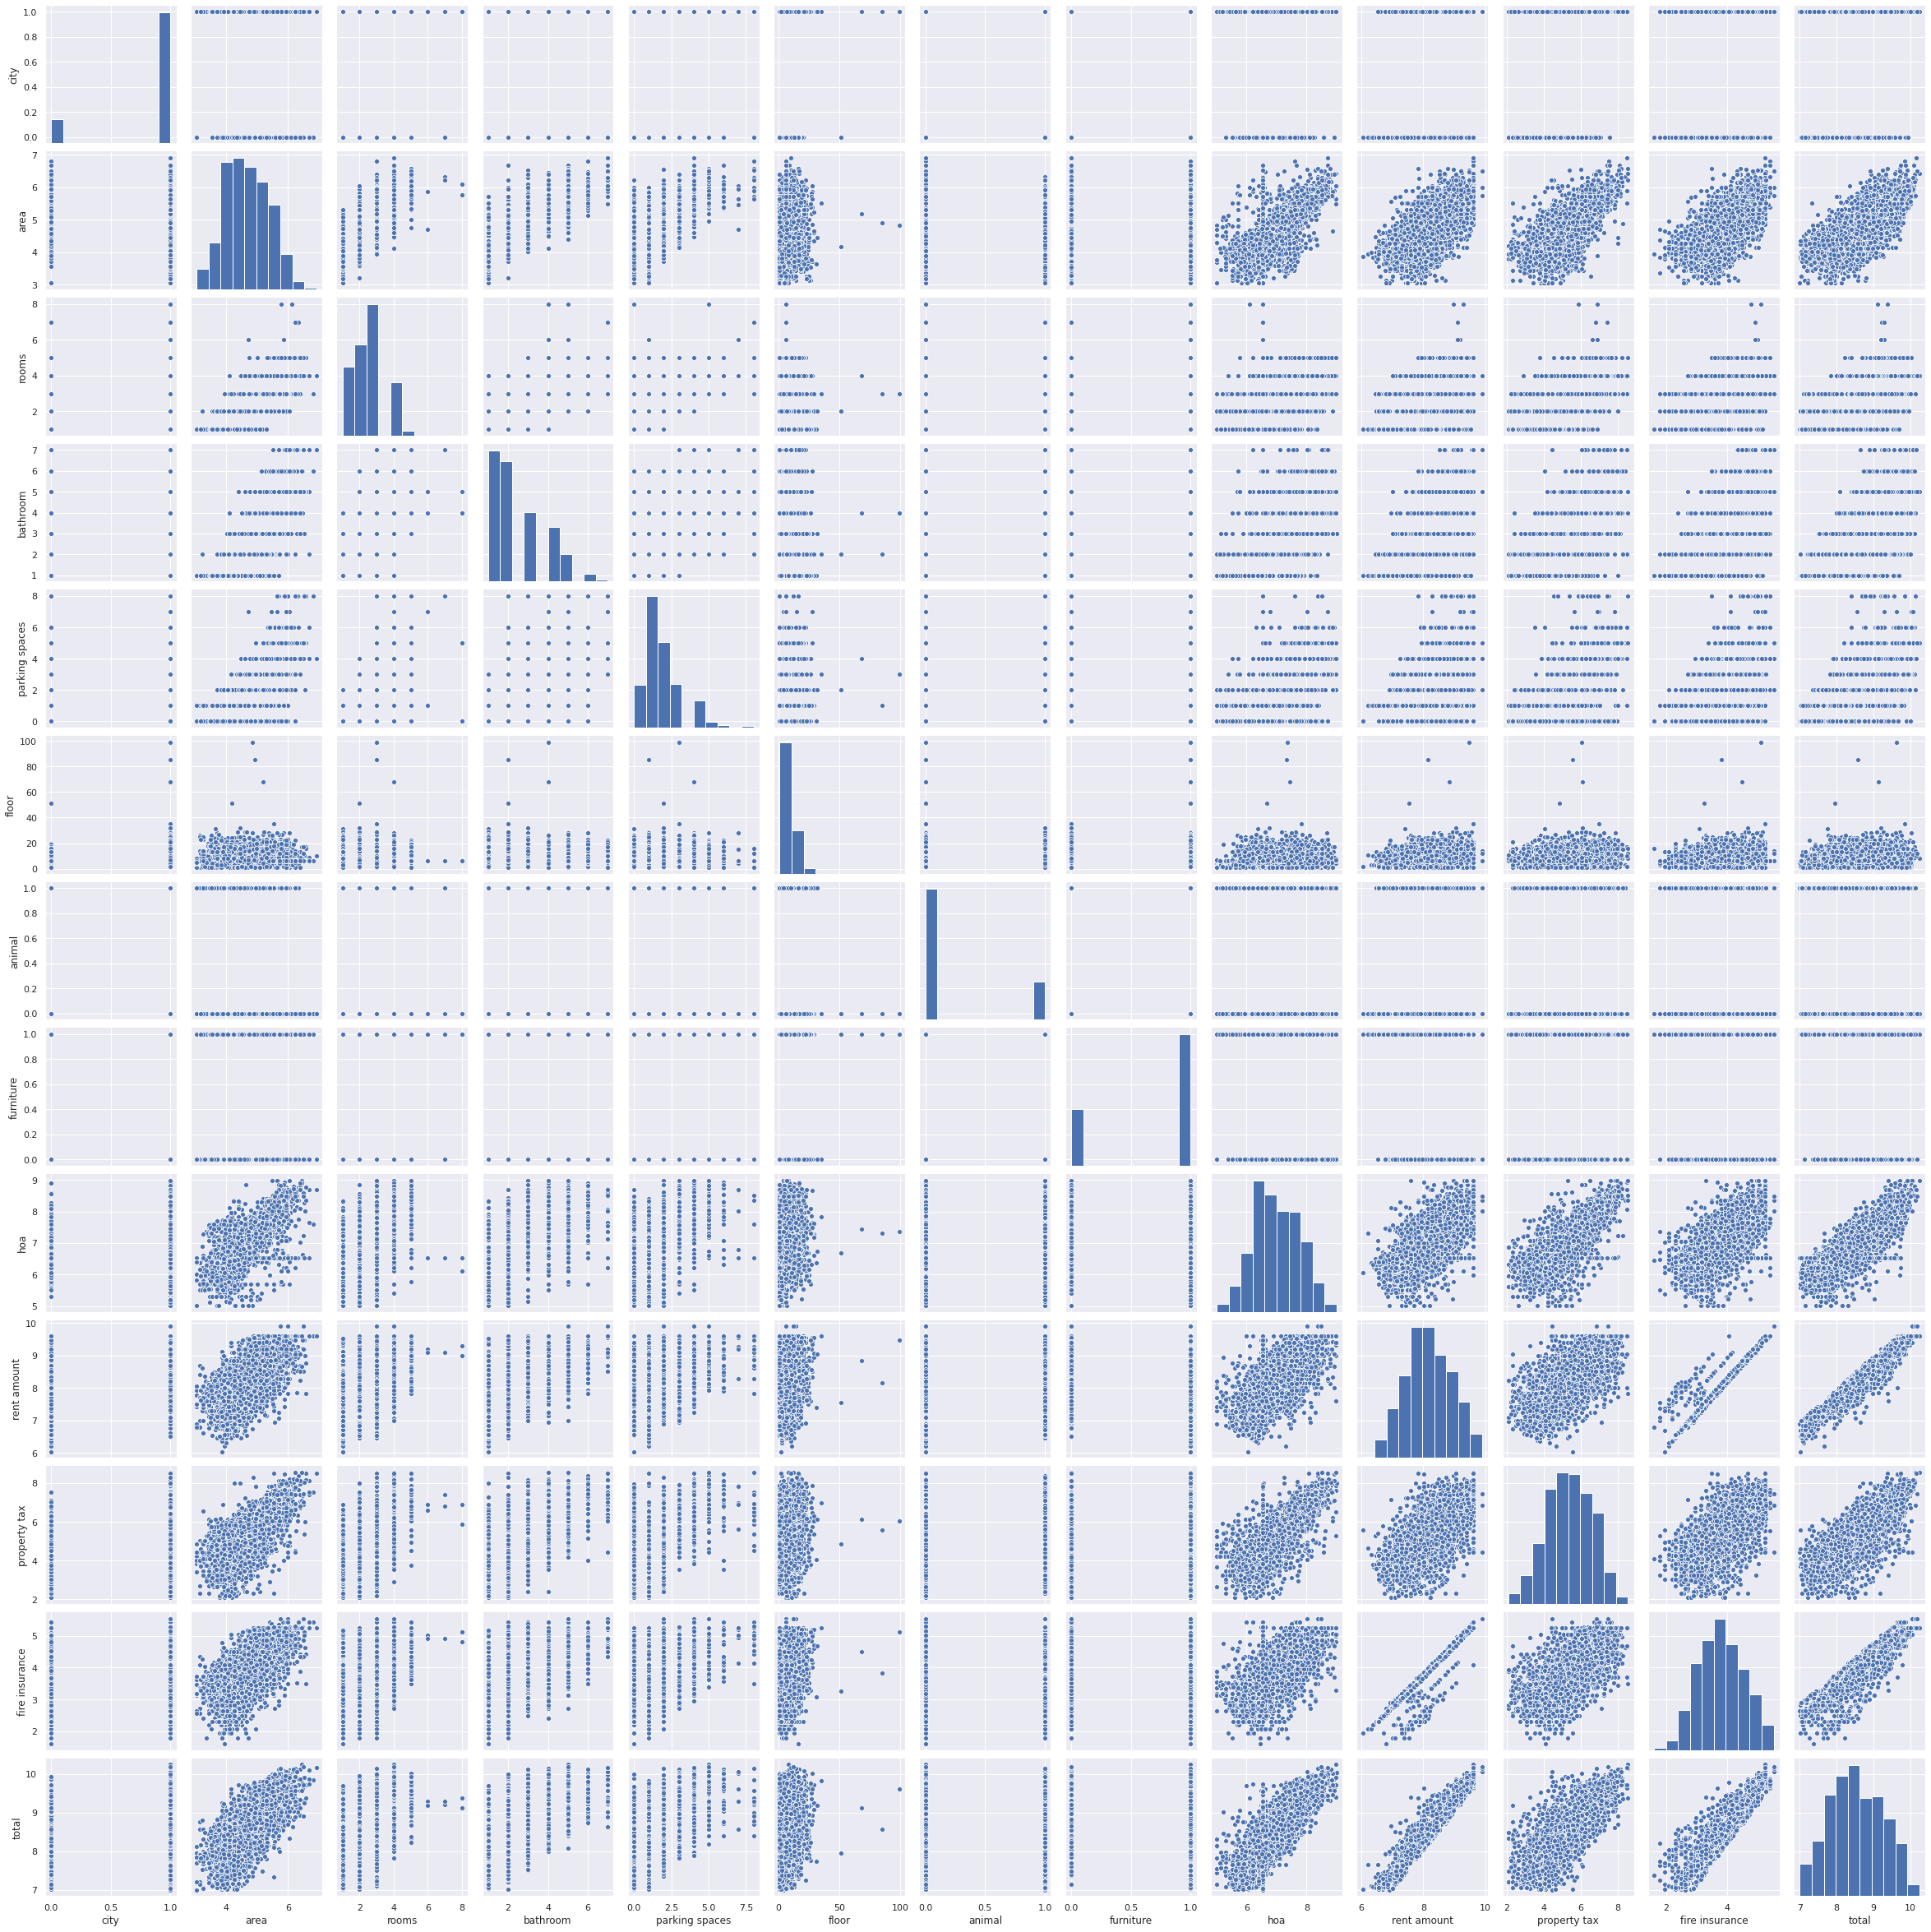

In [19]:
sns.pairplot(df)

#### Since the data has both catagorical and continous features lets plot them individualy 

### Boxplots

Text(0.5, 1.0, 'City and Total Price')

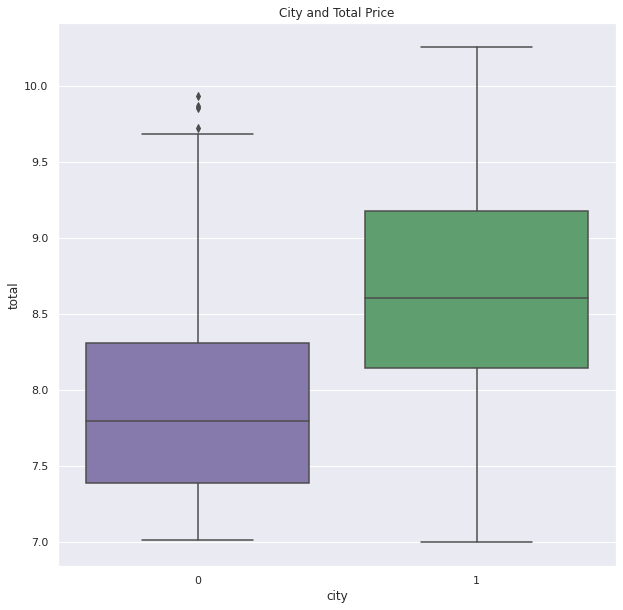

In [20]:
y = df.total
plt.figure(figsize=(10,10))
sns.boxplot(x="city", y="total", palette=["m", "g"], data=df)
plt.title('City and Total Price')

Text(0.5, 1.0, 'Floor and Total Price')

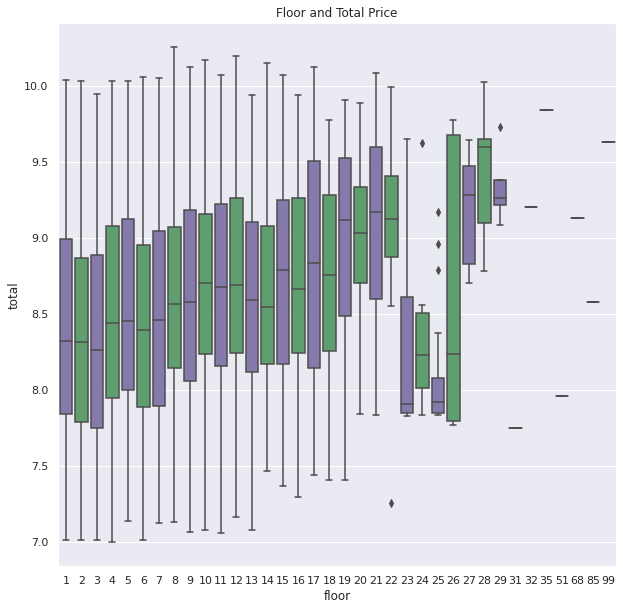

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(x="floor", y="total", palette=["m", "g"], data=df)
plt.title('Floor and Total Price')

In [22]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total'],
      dtype='object')

Text(0.5, 1.0, 'Parking space and Total Price')

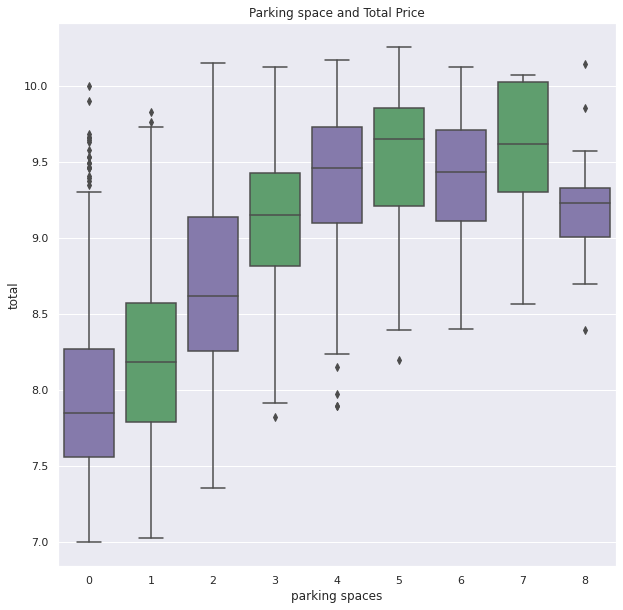

In [23]:
y = df.total
plt.figure(figsize=(10,10))
sns.boxplot(x="parking spaces", y="total", palette=["m", "g"], data=df)
plt.title('Parking space and Total Price')

Text(0.5, 1.0, 'Furniture and Total Price')

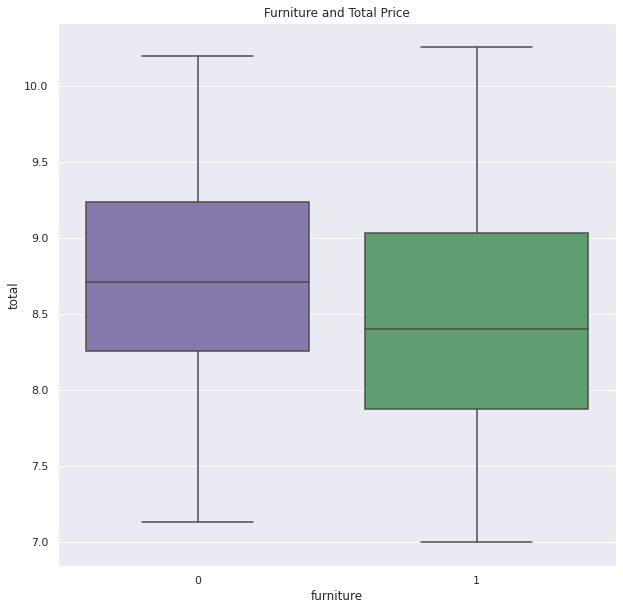

In [24]:
y = df.total
plt.figure(figsize=(10,10))
sns.boxplot(x="furniture", y="total", palette=["m", "g"], data=df)
plt.title('Furniture and Total Price')

Text(0.5, 1.0, 'Animal and Total Price')

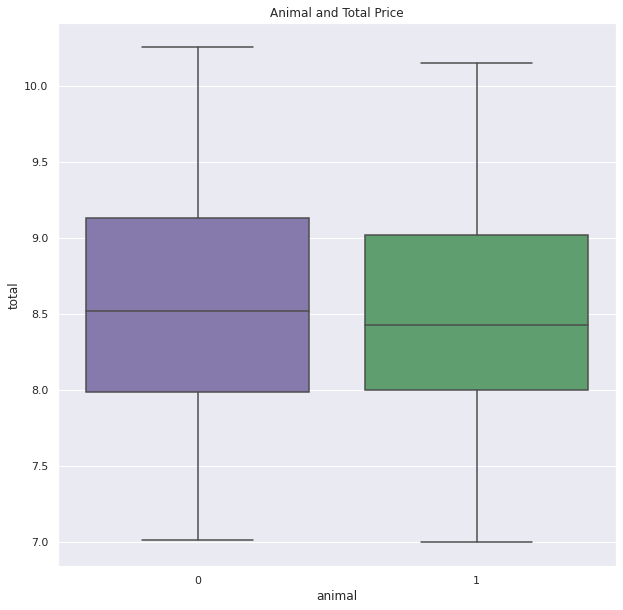

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x="animal", y="total", palette=["m", "g"], data=df)
plt.title('Animal and Total Price')

Text(0.5, 1.0, 'Bathroom and Total Price')

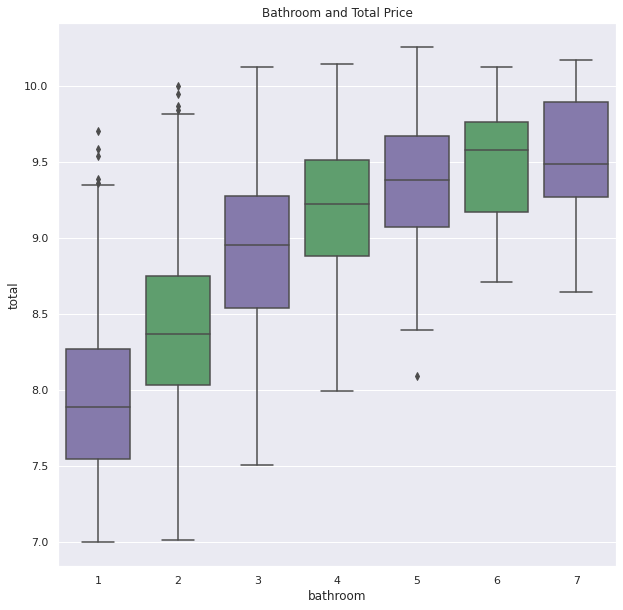

In [26]:
plt.figure(figsize=(10,10))
sns.boxplot(x="bathroom", y="total", palette=["m", "g"], data=df)
plt.title('Bathroom and Total Price')

Text(0.5, 1.0, 'rooms and Total Price')

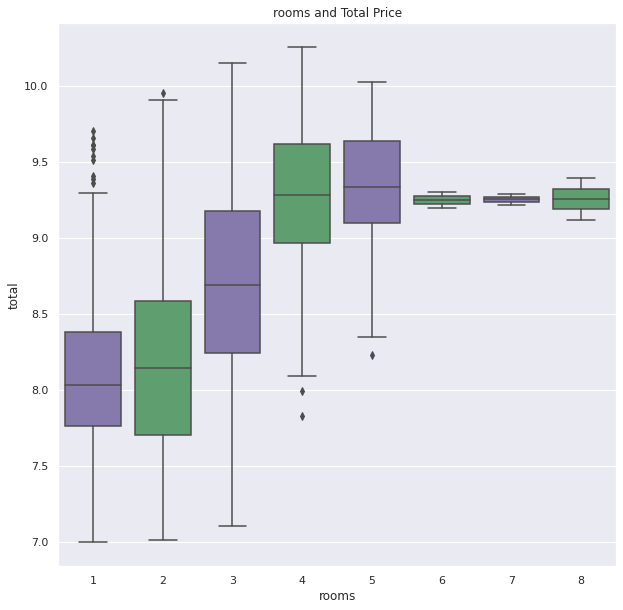

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(x="rooms", y="total", palette=["m", "g"], data=df)
plt.title('rooms and Total Price')

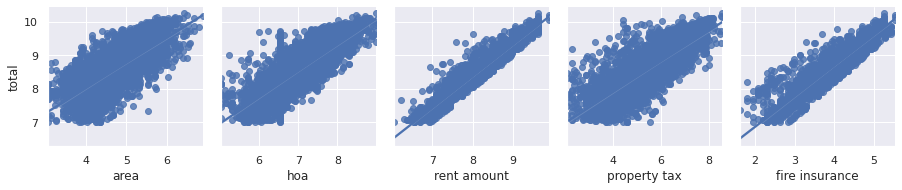

In [28]:
sns.pairplot(df, x_vars=['area','hoa','rent amount','property tax','fire insurance']\
             , y_vars='total', kind='reg')

### Linear Regression
#### Linear regression techinque attempts to model the relationship between two variables by fitting a linear equation to observed data. As described before our data has both catagorical as well as continuos variables lets build a model first without catagorical features and then with both features and see the performance of the model.

In [29]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

In [30]:
df.info()
df=df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3781 entries, 1 to 6077
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            3781 non-null   int64  
 1   area            3781 non-null   float64
 2   rooms           3781 non-null   int64  
 3   bathroom        3781 non-null   int64  
 4   parking spaces  3781 non-null   int64  
 5   floor           3781 non-null   int64  
 6   animal          3781 non-null   int64  
 7   furniture       3781 non-null   int64  
 8   hoa             3781 non-null   float64
 9   rent amount     3781 non-null   float64
 10  property tax    3781 non-null   float64
 11  fire insurance  3781 non-null   float64
 12  total           3781 non-null   float64
dtypes: float64(6), int64(7)
memory usage: 573.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3781 entries, 1 to 6077
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------   

In [31]:
x = df.drop(['total','city','rooms','bathroom','parking spaces','floor','animal','furniture'],axis='columns')
y = df.total

In [32]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=0)
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)
model.score(X_train,y_train)

0.7740465357811477
[ 0.01151849  0.22662203  0.71264404  0.05580114 -0.00129041]


0.9910584015154702

In [33]:
y_predicted = model.predict(X_test)
#y_predicted

In [34]:
cross_val_score(model,X_train,y_train)

array([0.99162375, 0.98896822, 0.99132264, 0.99230544, 0.99047813])

In [35]:
x2 = df.drop(['total'],axis='columns')
y2 = df.total
X_train,X_test,y_train,y_test = train_test_split(x2,y2,train_size=0.7,random_state=0)
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)
print(model.score(X_train,y_train))
cross_val_score(model,X_train,y_train)

0.8740623111711265
[ 9.22156764e-03  5.37051129e-03 -1.37826020e-03  9.56982160e-03
  3.70713253e-03  2.37937013e-04  4.74713482e-03 -9.94438480e-03
  2.25619478e-01  7.03184566e-01  5.19700275e-02 -2.83566248e-04]
0.9912726376740111


array([0.99202475, 0.98892085, 0.99119832, 0.99247099, 0.99080924])

#### As we can see that having all featured coloums in our training dataset the performance of the model slightly improves with accuracy score of 0.9912.